<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-Jan2023-Assignments/blob/main/Office_Hour_Data_Exploration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Handling with Variable Type Assignment & Submit**

## 2.2 Using the movie data, we have studied in this lesson. Complete the following tasks:

- Select a continuous and a categorical variable from the movie dataset and discuss the variable type of this variable. Discuss further in detail the type of selected continuous and categorical variables.
- Categorize a variable of your choice and assign a name to it
- Count the number of rows for each category

In [ ]:
from pandas.io.formats import style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
pd.options.display.float_format = '{:2f}'.format
plt.rcParams['figure.dpi'] = 100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('movies.csv')
df = pd.read_csv(file_path)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.100000,757074,333.130000,76.000000
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.000000,485820,126.460000,65.000000
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.300000,157606,138.120000,62.000000
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.200000,60545,270.320000,59.000000
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.200000,393727,325.020000,40.000000


In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 12 entries, Rank to Metascore
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
#df.describe(include ='0')
df.describe(include='object')

,Title,Genre,Description,Director,Actors
count,1000,1000,1000,1000,1000
unique,999,207,1000,644,996
top,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,2,50,1,8,2


### 2.2.a. Select a continuous and a categorical variable from the movie dataset and discuss the variable type of this variable. 

In [ ]:
variable_type = pd.Series(['continuous numerical - ordinal',
                           'string variable - nominal',
                           'categorical - nominal',
                           'string variable - nominal',
                           'categorical - nominal',
                           'categorical - nominal',
                           'numerical discrete - interval',
                           'discrete numerical - ratio',
                           'dicrete numerical - ordinal',
                           'continonus numerical - ordinal',
                           'continuous numerical - ratio',
                           'discrete numerical - ordinal'], index = df.dtypes.index)

In [ ]:
df_dtype = pd.concat([df.dtypes, df.nunique(), round(df.nunique()*100/len(df)), variable_type], axis=1)
df_dtype.columns = ['data type', 'No. of categories', 'categories/sample ratio %', 'variable_type']
df_dtype

,data type,No. of categories,categories/sample ratio %,variable_type
Rank,int64,1000,100.000000,continuous numerical - ordinal
Title,object,999,100.000000,string variable - nominal
Genre,object,207,21.000000,categorical - nominal
Description,object,1000,100.000000,string variable - nominal
Director,object,644,64.000000,categorical - nominal
Actors,object,996,100.000000,categorical - nominal
Year,int64,11,1.000000,numerical discrete - interval
Runtime (Minutes),int64,94,9.000000,discrete numerical - ratio
Rating,float64,55,6.000000,dicrete numerical - ordinal
Votes,int64,997,100.000000,continonus numerical - ordinal


### 2.2.b. Categorize a variable of your choice and assign a name to it

In [ ]:
df['Revenue Category'] = pd.cut(df['Revenue (Millions)'], bins=3, right=True, labels=['low', 'medium', 'high'])
#df['Revenue (Millions)'].value_counts(bins=3)
df['Revenue Category']

0      medium
1         low
2         low
3         low
4      medium
5         low
6         low
7         NaN
8         low
9         low
10        low
11        low
12     medium
13        low
14        low
15     medium
16        low
17        low
18        low
19        low
20        low
21        low
22        NaN
23        low
24        low
25        NaN
26        low
27        low
28        low
29        low
30        low
31        low
32        low
33     medium
34        low
35     medium
36        low
37        low
38        low
39        NaN
40        low
41        low
42        NaN
43        low
44        low
45        low
46        low
47        NaN
48        low
49        NaN
50       high
51        low
52        low
53        low
54     medium
55        low
56        low
57        low
58        low
59        low
60     medium
61        NaN
62        low
63        low
64        low
65        low
66        low
67        low
68        low
69        low
70        NaN
71    

In [ ]:
# example with range
binned_range = pd.cut(range(1,1000), bins=3, right=True, labels=['low', 'medium', 'high'])
binned_range


['low', 'low', 'low', 'low', 'low', ..., 'high', 'high', 'high', 'high', 'high']
Length: 999
Categories (3, object): ['low' < 'medium' < 'high']

### 2.2.c.Count the number of rows for each category

In [ ]:
df['Revenue Category'].value_counts()

low       835
medium     34
high        3
Name: Revenue Category, dtype: int64

Metascore and Rating can be converted to discrete numerical

## 2.3. Is it possible to convert categorical variable into numerical one? If so, how can you make that?

In [ ]:
d = dict(enumerate(df.Genre.astype('category').cat.categories))
df['Genre_discrete'] = df.Genre.astype('category').cat.codes

In [ ]:
d

{0: 'Action',
 1: 'Action,Adventure',
 2: 'Action,Adventure,Biography',
 3: 'Action,Adventure,Comedy',
 4: 'Action,Adventure,Crime',
 5: 'Action,Adventure,Drama',
 6: 'Action,Adventure,Family',
 7: 'Action,Adventure,Fantasy',
 8: 'Action,Adventure,Horror',
 9: 'Action,Adventure,Mystery',
 10: 'Action,Adventure,Romance',
 11: 'Action,Adventure,Sci-Fi',
 12: 'Action,Adventure,Thriller',
 13: 'Action,Adventure,Western',
 14: 'Action,Biography,Crime',
 15: 'Action,Biography,Drama',
 16: 'Action,Comedy',
 17: 'Action,Comedy,Crime',
 18: 'Action,Comedy,Drama',
 19: 'Action,Comedy,Family',
 20: 'Action,Comedy,Fantasy',
 21: 'Action,Comedy,Horror',
 22: 'Action,Comedy,Mystery',
 23: 'Action,Comedy,Romance',
 24: 'Action,Comedy,Sci-Fi',
 25: 'Action,Comedy,Sport',
 26: 'Action,Crime,Drama',
 27: 'Action,Crime,Fantasy',
 28: 'Action,Crime,Mystery',
 29: 'Action,Crime,Sci-Fi',
 30: 'Action,Crime,Sport',
 31: 'Action,Crime,Thriller',
 32: 'Action,Drama,Family',
 33: 'Action,Drama,Fantasy',
 34: 'A

In [ ]:
df['Genre_discrete']

0       11
1       85
2      195
3       92
4        7
5        7
6      116
7      108
8        2
9       74
10      80
11     102
12      11
13      89
14      18
15      89
16     102
17      55
18     100
19     173
20      76
21     149
22     142
23      89
24      11
25     108
26       5
27     195
28     108
29       5
30     108
31     183
32      11
33       3
34      49
35      11
36      75
37       7
38      13
39     112
40      89
41     149
42     190
43     102
44     149
45       7
46     183
47      71
48      11
49     149
50       7
51       7
52     112
53      31
54      26
55      72
56     146
57     176
58     118
59     100
60      11
61     193
62     144
63     178
64     173
65       3
66     162
67      11
68     149
69      40
70     161
71      37
72     153
73     176
74      89
75       7
76      53
77      77
78       7
79      20
80      11
81     112
82      97
83     144
84      31
85      11
86     139
87       7
88     144
89      26
90     144

In [ ]:
df['Genre_discrete_categories'] = df['Genre_discrete'].map(d)

In [ ]:
df['Genre_discrete'].nunique() == df.Genre.nunique

False

In [ ]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue Category,Genre_discrete,Genre_discrete_categories
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.100000,757074,333.130000,76.000000,medium,11,"Action,Adventure,Sci-Fi"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.000000,485820,126.460000,65.000000,low,85,"Adventure,Mystery,Sci-Fi"
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.300000,157606,138.120000,62.000000,low,195,"Horror,Thriller"
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.200000,60545,270.320000,59.000000,low,92,"Animation,Comedy,Family"
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.200000,393727,325.020000,40.000000,medium,7,"Action,Adventure,Fantasy"


## 2.4. While continuous data is generally preferred over discrete data, please indicate circumstances where discrete is the preferred data type although continuous data is available for the same characteristic.

In classification problems, categorical data are used as they fit the classification techniques and method.

In regression problems, continuous data is required.

## 2.5. While continuous data is measured and attribute data is counted, there is sometimes confusion if some specific dataset should be considered continuous or attribute. Provide some examples of confusing datasets and your inference.

- While measuring time we think that it is hour, month, year, so it will be attribute data but in actually it is continuous data because it can be break into minutes, seconds like that. But we can convert it into attribute data.


- Another confusing dataset when we are talking about money, when we withdraw money from atm it comes like 1000, 2000, 250, 2475 but if we see our bank balance in our records online then we see the figures like 200.35, so it is continuous data because it has several infinite values so it is continuous data.


- Another confusing dataset is percentage data or we can say that derived data, how we will consider it continuous or attribute. It depends on source data what it is actually according to that % data is decided. For example number of students taking this class divided by total number of graduate students is attribute data because a student can not be 3.5, 4.5

# **3. Missing Values Assignment & Submit**



In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

## 3.1. Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('states_all.csv')
df = pd.read_csv(file_path)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [6]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 25 entries, PRIMARY_KEY to AVG_READING_8_SCORE
dtypes: float64(22), int64(1), object(2)
memory usage: 335.1+ KB


In [7]:
df_datatype = pd.concat([df.dtypes, df.nunique(),
                         round(df.nunique()*100/len(df), 2),
                         df.isnull().sum(),
                         round(df.isnull().sum()*100/len(df),2)],
                        axis=1)

In [8]:
df_datatype

,0,1,2,3,4
PRIMARY_KEY,object,1715,100.00,0,0.00
STATE,object,53,3.09,0,0.00
YEAR,int64,33,1.92,0,0.00
ENROLL,float64,1224,71.37,491,28.63
TOTAL_REVENUE,float64,1274,74.29,440,25.66
FEDERAL_REVENUE,float64,1275,74.34,440,25.66
STATE_REVENUE,float64,1251,72.94,440,25.66
LOCAL_REVENUE,float64,1275,74.34,440,25.66
TOTAL_EXPENDITURE,float64,1275,74.34,440,25.66
INSTRUCTION_EXPENDITURE,float64,1275,74.34,440,25.66


In [9]:
df_datatype.columns = ['data type', 'No. of categories', 'No. of categories %', 'missing values', 'missing values %']

In [10]:
df_datatype.columns

Index(['data type', 'No. of categories', 'No. of categories %',
       'missing values', 'missing values %'],
      dtype='object')

In [11]:
df_datatype.sort_values(by='missing values %', ascending=False, inplace=True)

In [12]:
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.27,1153,67.23
AVG_MATH_4_SCORE,float64,50,2.92,1150,67.06
AVG_MATH_8_SCORE,float64,57,3.32,1113,64.90
AVG_READING_4_SCORE,float64,43,2.51,1065,62.10
GRADES_1_8_G,float64,1020,59.48,695,40.52
GRADES_9_12_G,float64,1070,62.39,644,37.55
ENROLL,float64,1224,71.37,491,28.63
OTHER_EXPENDITURE,float64,1222,71.25,491,28.63
SUPPORT_SERVICES_EXPENDITURE,float64,1275,74.34,440,25.66
CAPITAL_OUTLAY_EXPENDITURE,float64,1275,74.34,440,25.66


In [13]:
df_datatype = df_datatype.loc[df_datatype['missing values']!=0]
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.27,1153,67.23
AVG_MATH_4_SCORE,float64,50,2.92,1150,67.06
AVG_MATH_8_SCORE,float64,57,3.32,1113,64.90
AVG_READING_4_SCORE,float64,43,2.51,1065,62.10
GRADES_1_8_G,float64,1020,59.48,695,40.52
GRADES_9_12_G,float64,1070,62.39,644,37.55
ENROLL,float64,1224,71.37,491,28.63
OTHER_EXPENDITURE,float64,1222,71.25,491,28.63
SUPPORT_SERVICES_EXPENDITURE,float64,1275,74.34,440,25.66
CAPITAL_OUTLAY_EXPENDITURE,float64,1275,74.34,440,25.66


In [14]:
df_datatype[df_datatype.index=='AVG_READING_8_SCORE']['data type']

AVG_READING_8_SCORE    float64
Name: data type, dtype: object

### 3.2 Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [15]:
# drop those variable with more than 50% missing value
df_datatype.iloc[np.where(df_datatype['missing values %']>50)]

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.27,1153,67.23
AVG_MATH_4_SCORE,float64,50,2.92,1150,67.06
AVG_MATH_8_SCORE,float64,57,3.32,1113,64.90
AVG_READING_4_SCORE,float64,43,2.51,1065,62.10


In [16]:
columns_to_drop = df_datatype.iloc[np.where(df_datatype['missing values %'] > 50)].index

print(f""" columns, {columns_to_drop} can be dropped since more than 50% of data is missing, for the rest of variable, the missing value can be replaced by some values""")

 columns, Index(['AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE'],
      dtype='object') can be dropped since more than 50% of data is missing, for the rest of variable, the missing value can be replaced by some values


In [17]:
df.drop(columns_to_drop.to_list(), axis=1, inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_datatype.drop(index=columns_to_drop, axis=0, inplace=True)

<ipython-input-18-23aa85b22641>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datatype.drop(index=columns_to_drop, axis=0, inplace=True)


In [19]:
#keep the columns with at least 50% non-null values
# thresh should be int. it is optional but it cannot be combined with how. It require that many non-NA values.
df.dropna(axis='columns', thresh=round(len(df)/2), inplace=True)

In [20]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,1.275000e+03,1542.000000,1632.000000,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,9.034675e+05,17840.958495,68810.962010,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,1.329473e+06,30016.603510,80671.033008,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,1.815070e+05,2199.750000,19029.750000,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,5.104280e+05,8258.000000,48122.000000,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,9.661480e+05,22691.750000,78864.250000,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06


In [21]:
df_impute_median = df.copy(deep=True)
#When deep=True (default), a new object will be created with a copy of the calling object's data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object.
for col in df.columns:
  if col in df_datatype.index:
    df_impute_median[col] = df_impute_median[col].fillna(df_impute_median[col].median())

In [22]:
df_impute_median.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

In [23]:
df_impute_median = df.copy(deep=True)
#When deep=True (default), a new object will be created with a copy of the calling object's data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object.

df_impute_median.fillna(df_impute_median.median(numeric_only=True), inplace=True)


In [24]:
df_impute_median.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1715.00000,1715.000000,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03
mean,2002.075219,8.409261e+05,8.071645e+06,6.743326e+05,3.791186e+06,3.584183e+06,8.189349e+06,4.226732e+06,2.385717e+06,3.846453e+05,8.026293e+05,16874.28105,67809.688630,68194.730029,67127.643732,57500.714286,5.079104e+05,2.463393e+05,9.009913e+05
std,9.568621,9.089854e+05,1.028917e+07,1.001591e+06,4.841024e+06,4.816898e+06,1.048349e+07,5.509629e+06,2.938210e+06,4.573738e+05,1.158986e+06,28607.51285,78818.783078,78117.005891,76178.524321,65911.908766,5.279302e+05,2.653303e+05,1.031617e+06
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.00000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04
25%,1994.000000,4.646880e+05,2.992297e+06,2.602770e+05,1.618602e+06,1.162580e+06,3.004448e+06,1.570157e+06,8.996910e+05,1.624780e+05,2.608130e+05,2536.50000,20944.000000,20486.500000,20518.500000,17949.000000,3.158105e+05,1.457900e+05,2.800010e+05
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,5.104280e+05,8258.00000,48122.000000,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05
75%,2010.000000,8.694485e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,2.442635e+06,4.079995e+05,8.122720e+05,19689.00000,75726.000000,77052.000000,76719.500000,68023.000000,4.815905e+05,2.528075e+05,1.002840e+06
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.00000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06


In [25]:
df_impute_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

In [26]:
df_impute_median['YEAR'].nunique()
df_impute_median['YEAR'].value_counts()

1992    53
2003    53
2017    53
1990    53
2015    53
2013    53
2011    53
2009    53
2007    53
2005    53
2019    53
2002    53
1996    53
1994    53
2000    53
1998    53
1991    51
1995    51
1989    51
1988    51
1987    51
1986    51
2016    51
2014    51
2004    51
1997    51
2012    51
2010    51
1999    51
1993    51
2006    51
2001    51
2008    51
Name: YEAR, dtype: int64

In [27]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G'],
      dtype='object')

## 3.3. Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [28]:
df_time_series = df.copy(deep=True)

In [29]:
#df_time_series.groupby('YEAR'),['ENROLL'].unique()

df_time_series.groupby('YEAR')['ENROLL'].unique()


YEAR
1986                                                [nan]
1987                                                [nan]
1988                                                [nan]
1989                                                [nan]
1990                                                [nan]
1991                                                [nan]
1992                                                [nan]
1993    [727716.0, 121156.0, 676297.0, 311432.0, 51297...
1994    [730004.0, 123868.0, 708482.0, 312695.0, 41204...
1995    [727480.0, 125421.0, 735018.0, 447757.0, 52994...
1996    [735912.0, 126189.0, 764681.0, 452907.0, 54604...
1997    [737386.0, 128143.0, 783552.0, 457349.0, 55958...
1998    [739321.0, 130633.0, 794331.0, 456355.0, 57272...
1999    [737639.0, 133508.0, 814157.0, 451981.0, 58392...
2000    [730184.0, 132822.0, 814807.0, 450751.0, 59419...
2001    [728532.0, 131985.0, 834387.0, 449693.0, 60450...
2002    [726367.0, 133010.0, 859588.0, 449161.0, 61369...
2003    [

The pivot_table() function accepts a Pandas dataframe as an imput whereas the crosstab() function accepts both Pandas dataframes, and NumPy arrays. The crosstab() function can be used to view to normalize data. The pivot_table() function does not contain any default functionality for data normalization.

In [30]:
pd.set_option('Display.max_column', None, 'Display.max_row', None)

In [31]:
#original data frame
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,NaN,NaN,612635.0
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,NaN,48542.0,5731.0,41319.0,38058.0,33691.0,28366.0,NaN,NaN,488476.0
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,NaN,30595.0,463.0,8025.0,8272.0,8012.0,6129.0,NaN,NaN,104321.0
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,316679.0,NaN,47272.0,4818.0,6667.0,5832.0,5000.0,3433.0,NaN,NaN,80937.0
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,3410440.0,NaN,1667826.0,31464.0,161701.0,164416.0,142372.0,100835.0,NaN,NaN,1981407.0


In [32]:
df_grouped_by_year = pd.pivot_table(data = df_time_series, index='YEAR', values=df_datatype.index, aggfunc=[np.median, len], dropna=True)
df_grouped_by_year

median                                        \
     CAPITAL_OUTLAY_EXPENDITURE    ENROLL FEDERAL_REVENUE GRADES_12_G   
YEAR                                                                    
1986                        NaN       NaN             NaN     36222.0   
1987                        NaN       NaN             NaN     38596.0   
1988                        NaN       NaN             NaN     37538.0   
1989                        NaN       NaN             NaN     35618.0   
1990                        NaN       NaN             NaN     34645.0   
1991                        NaN       NaN             NaN     34638.0   
1992                   194081.0       NaN        211627.0     34533.0   
1993                   196098.0  509814.0        196584.0     34744.0   
1994                   223352.0  518425.0        224106.0     35464.0   
1995                   243365.0  638880.0        248319.0     35480.0   
1996                   318829.0  635678.0        270455.0     36113.0   
1997                   369529.0  631592.0        278209.0     37568.0   
1998                   340415.0  645232.0        313550.0     38769.0   
1999                   448757.0  652731.0        323924.0     39111.0   
2000                   428541.0  646467.0        354829.0     39409.0   
2001                   419442.0  643730.0        385896.0     38379.0   
2002                   542302.0  654363.0        438583.0     38902.0   
2003                   469251.0  660782.0        482904.0     38834.0   
2004                   533020.0  663886.0        516520.0     39200.0   
2005                   496778.0  674502.0        552628.0     39157.0   
2006                   592789.0  648313.0        580810.0     40267.0   
2007                   647628.0  646360.0        574090.0     40927.0   
2008                   760566.0  662971.0        629423.0     43189.0   
2009                   784529.0  662774.0        675576.0     43097.0   
2010                   747498.0  663802.0        945973.0     43723.0   
2011                   661195.0  665109.0        969288.0     43928.0   
2012                   666528.0  665478.0        773014.0     44032.0   
2013                   616590.0  671445.0        707522.0     43732.0   
2014                   620745.0  670069.0        681230.0     43862.0   
2015                   606254.0  671715.0        688990.0     44659.0   
2016                   686104.0  672777.0        690724.0     45277.0   
2017                        NaN       NaN             NaN     46516.0   
2019                        NaN       NaN             NaN         NaN   

                                                                    \
     GRADES_1_8_G GRADES_4_G GRADES_8_G GRADES_9_12_G GRADES_ALL_G   
YEAR                                                                 
1986          NaN    41114.0    40066.0           NaN     558415.0   
1987          NaN    43254.0    40269.0           NaN     572421.0   
1988          NaN    43540.0    39317.0           NaN     574890.0   
1989          NaN    45931.0    40762.0           NaN     578580.0   
1990          NaN    47341.0    42319.0           NaN     579087.0   
1991          NaN    49387.0    43176.0           NaN     593030.0   
1992          NaN    49666.0    45025.0           NaN     612635.0   
1993          NaN    48242.0    47665.0           NaN     625062.0   
1994          NaN    48233.0    49332.0           NaN     640521.0   
1995          NaN    47407.0    50091.0           NaN     645586.0   
1996          NaN    47018.0    49641.0           NaN     652816.0   
1997     397019.0    47241.0    50385.0      186592.0     659273.0   
1998     393530.0    48707.0    49580.0      186742.0     655687.0   
1999     391065.0    49323.0    48427.0      183055.0     648180.0   
2000     401331.0    50899.0    48938.0      184185.0     665850.0   
2001     391238.0    49288.0    47019.0      179275.0     654363.0   
2002     394286.0    48636.0    48934.0      182479.0     660782.0

In [33]:
#df_grouped_by_year.loc[2009, 'CAPITAL_OUTLAY_EXPENDITURE']

In [34]:
for col in df.columns:
  if col in df_datatype.index: # if df[col].isnull().sum!=0

  #values = {i:df_grouped_by_year.loc[i,col] for i df_grouped_by_year.index}
    for y in df_grouped_by_year.index:
      df_time_series.loc[df_time_series.YEAR==y, col] = df_time_series.loc[df_time_series.YEAR==y, col].fillna(df_grouped_by_year.loc[y, ('median', col)])

  # df_time_series[col] = df_time_series[col].fillna(value=values, Axis=0) 

In [35]:
df_time_series.loc[df_time_series['YEAR'] == 1992]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,NaN,NaN,612635.0
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,NaN,48542.0,5731.0,41319.0,38058.0,33691.0,28366.0,NaN,NaN,488476.0
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,NaN,30595.0,463.0,8025.0,8272.0,8012.0,6129.0,NaN,NaN,104321.0
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,316679.0,NaN,47272.0,4818.0,6667.0,5832.0,5000.0,3433.0,NaN,NaN,80937.0
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,3410440.0,NaN,1667826.0,31464.0,161701.0,164416.0,142372.0,100835.0,NaN,NaN,1981407.0


In [36]:
df_time_series_modified = df_time_series.dropna()

In [37]:
df_time_series_impute_median = df_time_series.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_time_series_impute_median[col] = df_time_series_impute_median[col].fillna(df_time_series_impute_median[col].median())

In [38]:
df.groupby('YEAR').head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,204207.0,8264.0,56598.0,57497.0,60004.0,39900.0,NaN,NaN,734288.0
52,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,433788.0,36291.0,135791.0,2787.0,10329.0,10156.0,9160.0,6975.0,NaN,NaN,125948.0
53,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,1000914.0,164083.0,680139.0,3164.0,57656.0,57701.0,53500.0,37614.0,NaN,NaN,709453.0
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,386526.0,68617.0,97824.0,1248.0,34337.0,34255.0,36471.0,27169.0,NaN,NaN,444271.0
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,1944760.0,59954.0,444104.0,420233.0,380223.0,277271.0,NaN,NaN,5327231.0


## 3.4. This time, fill in the missing values using interpolation (extrapolation).

The main idea in interpolation is to fill in the missing values between the two missing values using these non-missing values. For example, if we have a missing value between two missing values we can average the two missing values and assign them to the missing one. However, interpolation requires a meaningful sequence of observations and a trend in the ordered data. For this reason, this method is espacially popular among time-series analysis. However, applying to unsorted data may be errroneous.

.interpolate(method='linear, limit_direction='forward' 

In [39]:
df_interpolate = df.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_interpolate[col] = df_interpolate[col].interpolate(method = 'linear', limit_direction = 'forward')

In [40]:
df_interpolate.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1.664000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.664000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1.460000e+03,1.460000e+03,1.715000e+03
mean,2002.075219,6.999133e+05,7.291406e+06,6.023584e+05,3.441789e+06,3.247259e+06,7.366192e+06,3.781149e+06,2.144610e+06,3.304271e+05,7.882297e+05,17088.765889,65842.225656,66183.855394,65153.356851,55903.484548,4.215568e+05,2.706785e+05,8.742983e+05
std,9.568621,9.840401e+05,1.059689e+07,1.028205e+06,4.966475e+06,4.955804e+06,1.080380e+07,5.685971e+06,3.035901e+06,4.877496e+05,1.162871e+06,29169.489099,79787.669027,79112.025351,77174.468674,66726.316969,6.129444e+05,3.153675e+05,1.044932e+06
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04
25%,1994.000000,9.451100e+04,2.044669e+06,1.230120e+05,1.175899e+06,7.457580e+05,2.034229e+06,9.214940e+05,5.857000e+05,5.357000e+04,2.608130e+05,1891.000000,13925.500000,14956.000000,14656.500000,12923.500000,5.899800e+04,7.626436e+04,1.892720e+05
50%,2002.000000,3.295345e+05,2.906573e+06,2.538890e+05,1.546921e+06,1.125436e+06,2.930393e+06,1.534954e+06,8.716130e+05,1.448705e+05,4.543020e+05,7865.000000,45010.000000,46094.000000,44641.000000,38013.000000,1.786520e+05,1.826211e+05,5.970960e+05
75%,2010.000000,8.768110e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,2.442635e+06,4.181240e+05,8.122720e+05,20857.500000,75726.000000,77052.000000,76719.500000,68023.000000,5.305565e+05,3.183002e+05,1.002840e+06
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06


## 3.5. Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

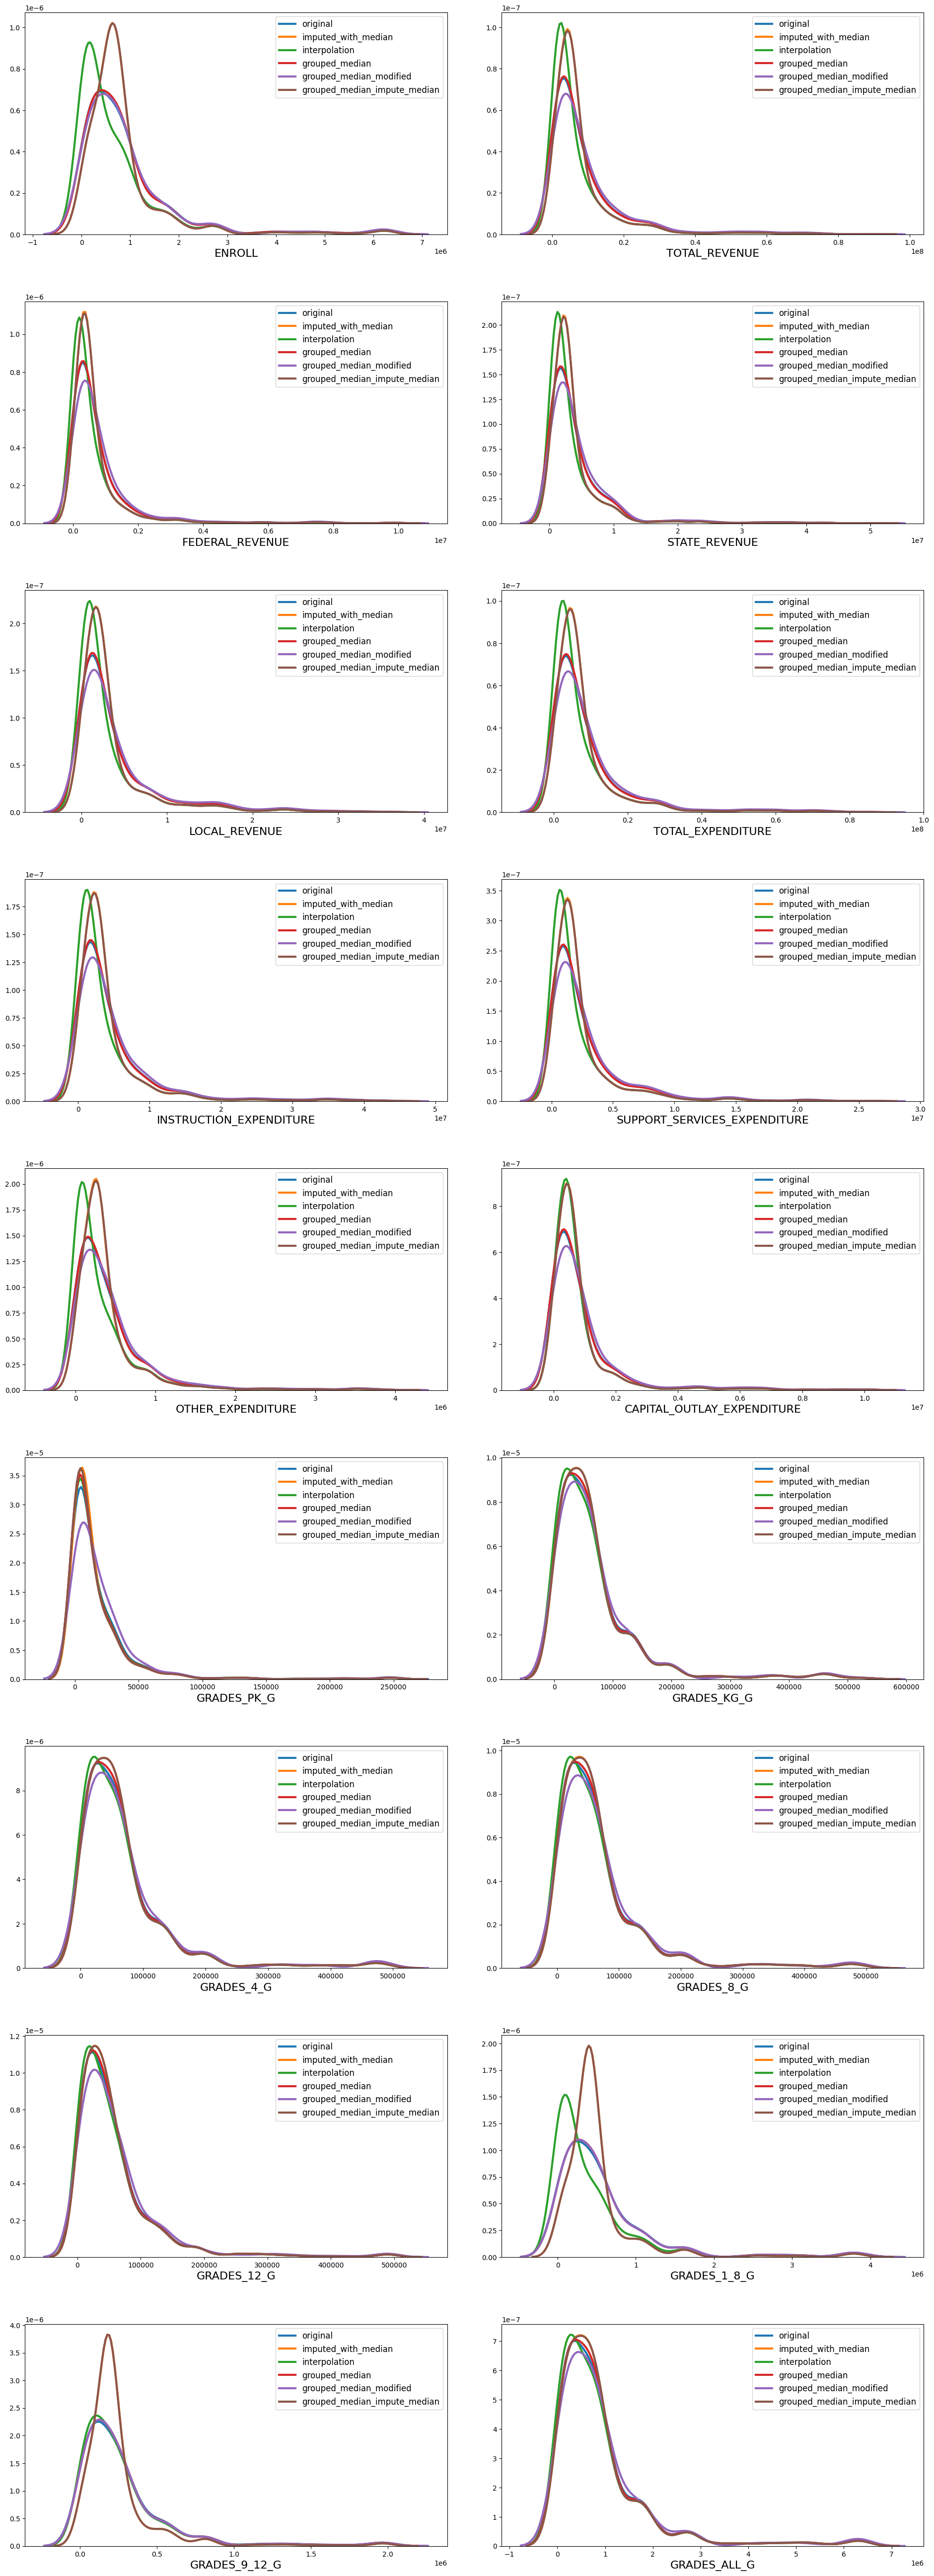

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

k=0
plt.figure(figsize=(20,70))

for col in df.columns:
  if col in df_datatype.index:
    k += 1
    plt.subplot(12,2,k)
    sns.kdeplot(df[col], label='original', linewidth=3)
    sns.kdeplot(df_impute_median[col], label='imputed_with_median', linewidth=3)
    sns.kdeplot(df_interpolate[col], label='interpolation', linewidth=3)
    sns.kdeplot(df_time_series[col], label='grouped_median', linewidth=3)
    sns.kdeplot(df_time_series_modified[col], label='grouped_median_modified', linewidth=3)
    sns.kdeplot(df_time_series_impute_median[col], label='grouped_median_impute_median', linewidth=3)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.legend(fontsize=12)

plt.tight_layout(pad=5.0)
plt.show()


#**4. Outliers Assignment & Submit**

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state-level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Don't forget to apply the most suitable missing-value-filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

6. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

## 4.1 Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

YES !

In [42]:
df_time_series_impute_median.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

In [43]:
df_time_series_impute_median.isnull().any().sum()

0

In [44]:
df_new = df_time_series_impute_median.copy(deep=True)
df_new.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,653109.5,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,274193.0,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,403687.0,186111.0,731634.0
1,1992_ALASKA,ALASKA,1992,653109.5,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,274193.0,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,403687.0,186111.0,122487.0
2,1992_ARIZONA,ARIZONA,1992,653109.5,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,274193.0,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,403687.0,186111.0,673477.0
3,1992_ARKANSAS,ARKANSAS,1992,653109.5,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,274193.0,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,403687.0,186111.0,441490.0
4,1992_CALIFORNIA,CALIFORNIA,1992,653109.5,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,274193.0,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,403687.0,186111.0,5254844.0


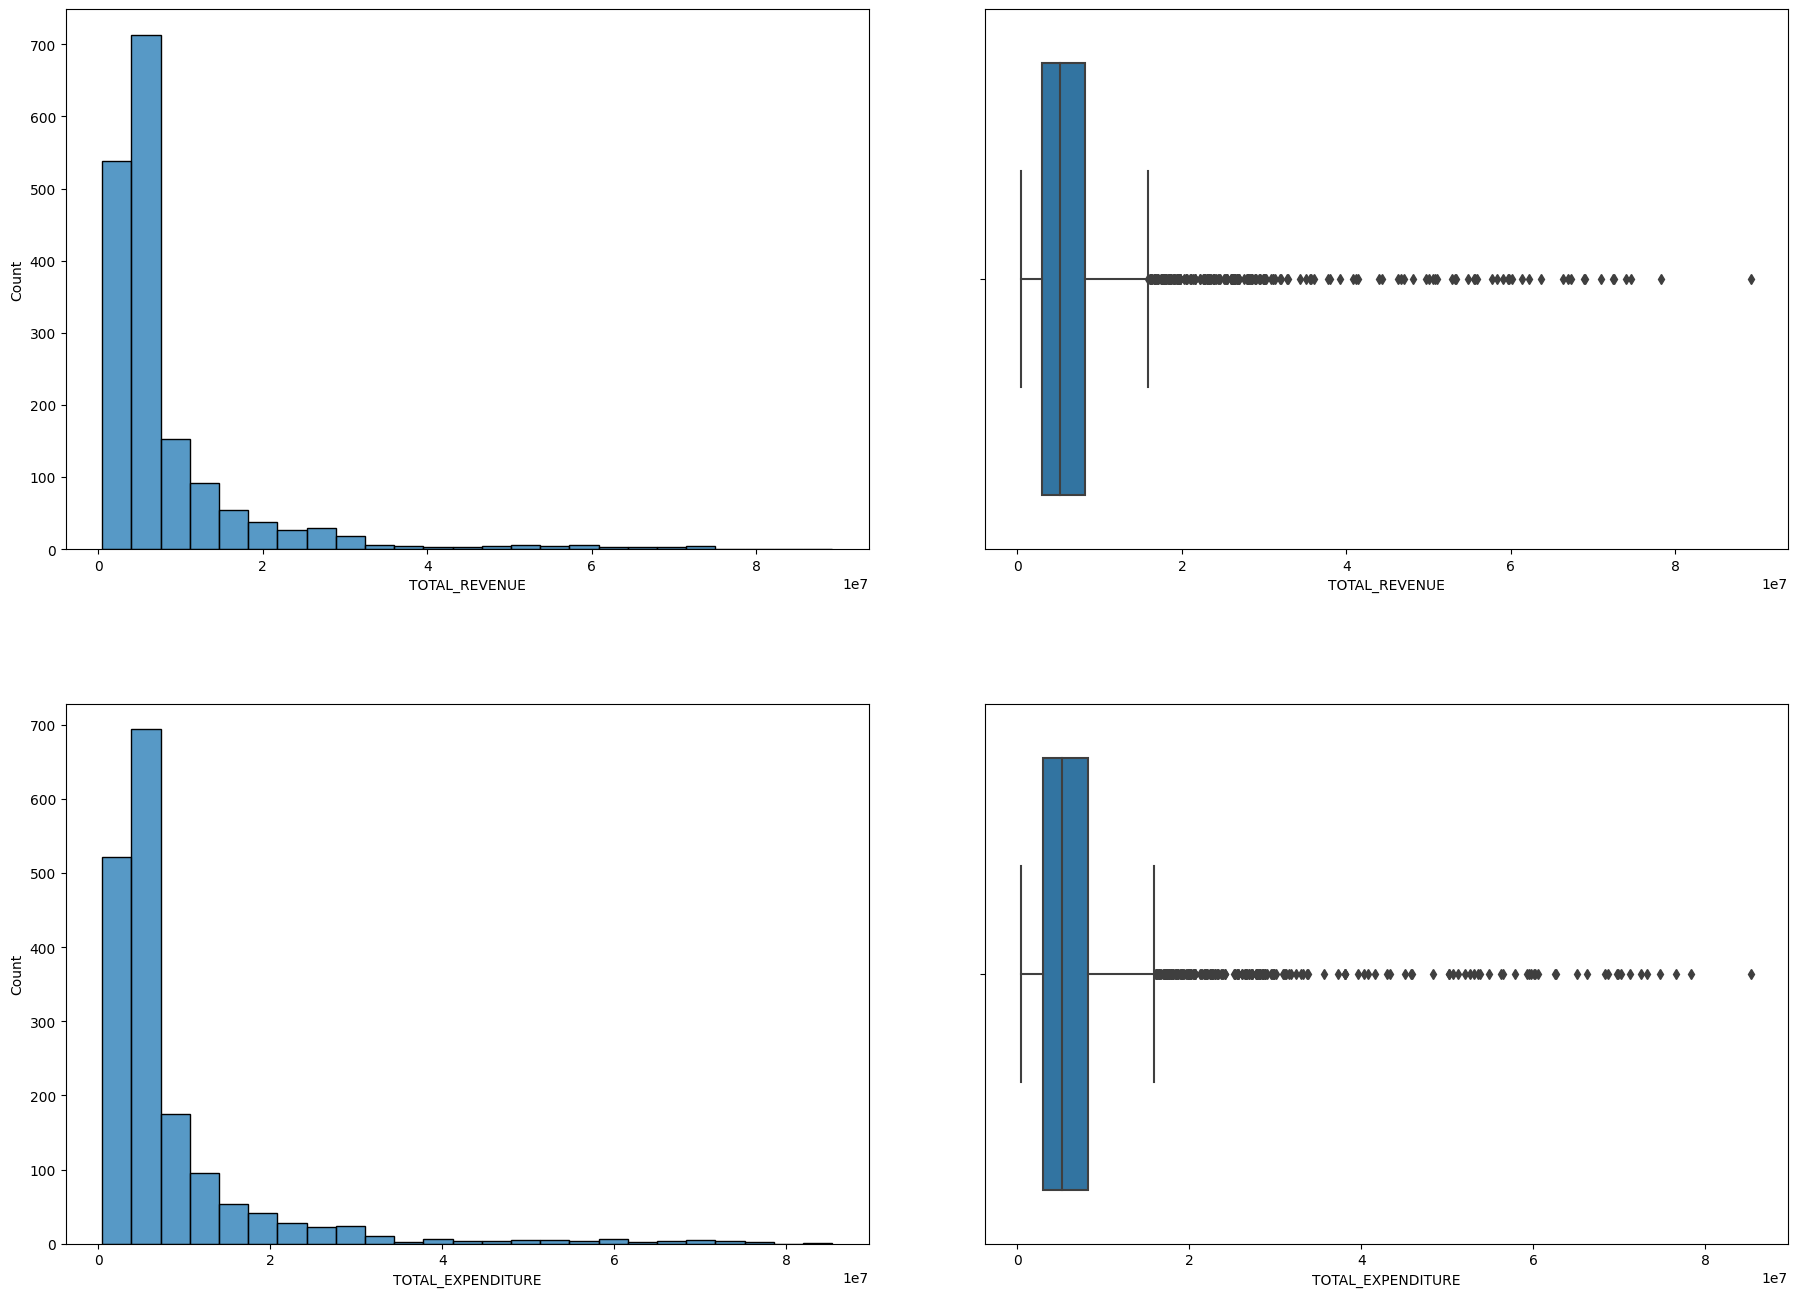

In [45]:
#method 1: visualizing data distribution
fig, ax=plt.subplots(2,2,figsize=(20,15))
#np.ravel(ax)[1]
sns.histplot(df_new['TOTAL_REVENUE'], ax=ax[0,0], bins=25)
#using whis upper bound and lower bound can be adjusted.
sns.boxplot(data=df_new, x='TOTAL_REVENUE', ax=ax[0,1], whis=1.5)

sns.histplot(df_new['TOTAL_EXPENDITURE'], ax=ax[1,0], bins=25)
sns.boxplot(data=df_new, x='TOTAL_EXPENDITURE', ax=ax[1,1], whis=1.5)

plt.tight_layout(pad=8.0)
plt.show()

In [46]:
df_new['TOTAL_EXPENDITURE'].value_counts(bins=25, normalize=True)

(3875203.72, 7268742.44]      0.404665
(396826.531, 3875203.72]      0.304373
(7268742.44, 10662281.16]     0.102041
(10662281.16, 14055819.88]    0.055977
(14055819.88, 17449358.6]     0.030904
(17449358.6, 20842897.32]     0.023907
(20842897.32, 24236436.04]    0.016327
(27629974.76, 31023513.48]    0.013994
(24236436.04, 27629974.76]    0.012828
(31023513.48, 34417052.2]     0.005831
(37810590.92, 41204129.64]    0.003499
(58171823.24, 61565361.96]    0.003499
(68352439.4, 71745978.12]     0.002915
(47991207.08, 51384745.8]     0.002915
(51384745.8, 54778284.52]     0.002915
(54778284.52, 58171823.24]    0.002332
(71745978.12, 75139516.84]    0.001749
(64958900.68, 68352439.4]     0.001749
(41204129.64, 44597668.36]    0.001749
(44597668.36, 47991207.08]    0.001749
(61565361.96, 64958900.68]    0.001166
(34417052.2, 37810590.92]     0.001166
(75139516.84, 78533055.56]    0.001166
(81926594.28, 85320133.0]     0.000583
(78533055.56, 81926594.28]    0.000000
Name: TOTAL_EXPENDITURE, 

In [47]:
df_new['TOTAL_REVENUE'].value_counts(bins=25, normalize=True)

(4015714.48, 7565778.96]      0.415743
(376898.387, 4015714.48]      0.313703
(7565778.96, 11115843.44]     0.089213
(11115843.44, 14665907.92]    0.053644
(14665907.92, 18215972.4]     0.031487
(18215972.4, 21766036.88]     0.022157
(25316101.36, 28866165.84]    0.017493
(21766036.88, 25316101.36]    0.015743
(28866165.84, 32416230.32]    0.010496
(57266681.68, 60816746.16]    0.003499
(50166552.72, 53716617.2]     0.003499
(32416230.32, 35966294.8]     0.003499
(46616488.24, 50166552.72]    0.002915
(71466939.6, 75017004.08]     0.002332
(35966294.8, 39516359.28]     0.002332
(53716617.2, 57266681.68]     0.002332
(64366810.64, 67916875.12]    0.001749
(67916875.12, 71466939.6]     0.001749
(43066423.76, 46616488.24]    0.001749
(60816746.16, 64366810.64]    0.001749
(39516359.28, 43066423.76]    0.001749
(75017004.08, 78567068.56]    0.000583
(85667197.52, 89217262.0]     0.000583
(78567068.56, 82117133.04]    0.000000
(82117133.04, 85667197.52]    0.000000
Name: TOTAL_REVENUE, dtyp

In [48]:
df_new[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].describe()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
count,1.715000e+03,1.715000e+03
mean,8.087448e+06,8.194427e+06
std,1.028672e+07,1.048418e+07
min,4.656500e+05,4.816650e+05
25%,2.984292e+06,2.995256e+06
50%,5.128559e+06,5.245560e+06
75%,8.165744e+06,8.220253e+06
max,8.921726e+07,8.532013e+07


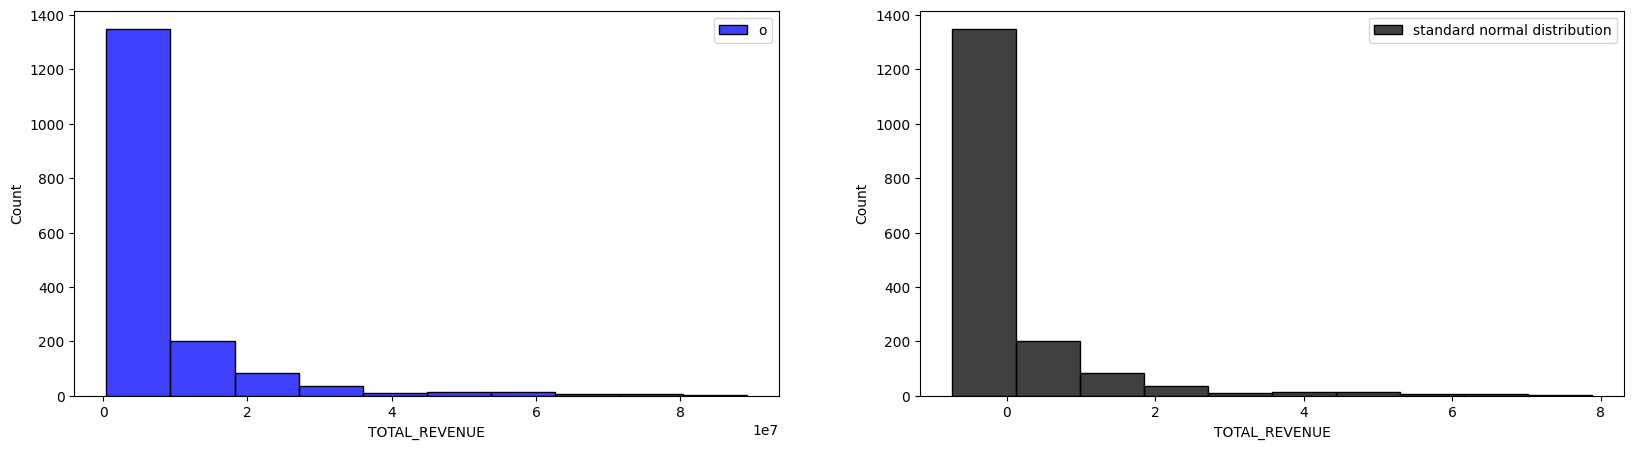

In [49]:
#good symmetric distribution since it is calculated based on the distance from mean
from scipy.stats import zscore

z_score = zscore(df_new['TOTAL_REVENUE'])

fig, ax = plt.subplots(1,2,figsize=(20,5))

#plot Total_Revenue
sns.histplot(df_new['TOTAL_REVENUE'], color='blue', ax=ax[0], label = 'original distribution', bins=10)
ax[0].legend('original distribution')

#plot zscore of Total_Revenue
sns.histplot(z_score, color='black', ax = ax[1], label='standard normal distribution', bins=10)
ax[1].legend('standard normal distribution')


plt.legend()
plt.show()

In [50]:
for i in range(1,5):
  print('The score threshold is: {}'.format(i))
  print('The indices of outliers:')
  #print('np.where(z_score > i')
  print('Number of outliers is: {}'.format(len((np.where(z_score>i)[0]))))
  print(('-'*30))

The score threshold is: 1
The indices of outliers:
Number of outliers is: 164
------------------------------
The score threshold is: 2
The indices of outliers:
Number of outliers is: 70
------------------------------
The score threshold is: 3
The indices of outliers:
Number of outliers is: 43
------------------------------
The score threshold is: 4
The indices of outliers:
Number of outliers is: 33
------------------------------


In [51]:
# good for skewed data since it is calculated based on median
iqr = np.quantile(df_new['TOTAL_REVENUE'], 0.75) - np.quantile(df_new['TOTAL_REVENUE'], 0.25)
upper_bound = np.quantile(df_new['TOTAL_REVENUE'], 0.75) + 1.5 * iqr
lower_bound = np.quantile(df_new['TOTAL_REVENUE'], 0.25) + 1.5 * iqr

df_new[(df_new['TOTAL_REVENUE']>upper_bound) & (df_new['TOTAL_REVENUE']<lower_bound)]['TOTAL_REVENUE']

print(upper_bound < df_new['TOTAL_REVENUE'].max())

True


In [52]:
df_new['TOTAL_REVENUE'].describe()

count    1.715000e+03
mean     8.087448e+06
std      1.028672e+07
min      4.656500e+05
25%      2.984292e+06
50%      5.128559e+06
75%      8.165744e+06
max      8.921726e+07
Name: TOTAL_REVENUE, dtype: float64

## 4.2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

winsorize(a, limits=[limits[0], limits[1]])

winsorize set the lowest values to limits[0] th percentile, set the highest values to the (1 - limits[1] th percentile

In [53]:
from scipy.stats.mstats import winsorize

#replacing the 15% of the highest values
TOTAL_REVENUE_winsorization = winsorize(np.array(df_new['TOTAL_REVENUE']), (0, 0.15))
TOTAL_EXPENDITURE_winsorization = winsorize(np.array(df_new['TOTAL_EXPENDITURE'].dropna()), (0, 0.15))
pd.Series(TOTAL_REVENUE_winsorization).describe()

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    1.715000e+03
mean     5.991201e+06
std      3.873009e+06
min      4.656500e+05
25%      2.984292e+06
50%      5.128559e+06
75%      8.165744e+06
max      1.299936e+07
dtype: float64

In [54]:
df_winsorize_comparison = pd.concat([df_new['TOTAL_REVENUE'].describe(),
              pd.Series(TOTAL_REVENUE_winsorization).describe()], axis=1)
df_winsorize_comparison.columns = ['TOTAL_REVENUE', 'TOTAL REVENUE vinsorized']

df_winsorize_comparison

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,TOTAL_REVENUE,TOTAL REVENUE vinsorized
count,1.715000e+03,1.715000e+03
mean,8.087448e+06,5.991201e+06
std,1.028672e+07,3.873009e+06
min,4.656500e+05,4.656500e+05
25%,2.984292e+06,2.984292e+06
50%,5.128559e+06,5.128559e+06
75%,8.165744e+06,8.165744e+06
max,8.921726e+07,1.299936e+07


The mean changes because it is sensitive to outliers but median and other percentiles do not change

In [55]:
df_winsorize_comparison = pd.concat([df_new['TOTAL_EXPENDITURE'].describe(),
                pd.Series(TOTAL_EXPENDITURE_winsorization).describe()], axis=1)

df_winsorize_comparison.columns = ['TOTAL_EXPENDITURE', 'TOTAL EXPRNDITURE winsorized']

df_winsorize_comparison

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,TOTAL_EXPENDITURE,TOTAL EXPRNDITURE winsorized
count,1.715000e+03,1.715000e+03
mean,8.194427e+06,6.005416e+06
std,1.048418e+07,3.806786e+06
min,4.816650e+05,4.816650e+05
25%,2.995256e+06,2.995256e+06
50%,5.245560e+06,5.245560e+06
75%,8.220253e+06,8.220253e+06
max,8.532013e+07,1.279409e+07


Note that central tendency mean has changed significantly

<Axes: >

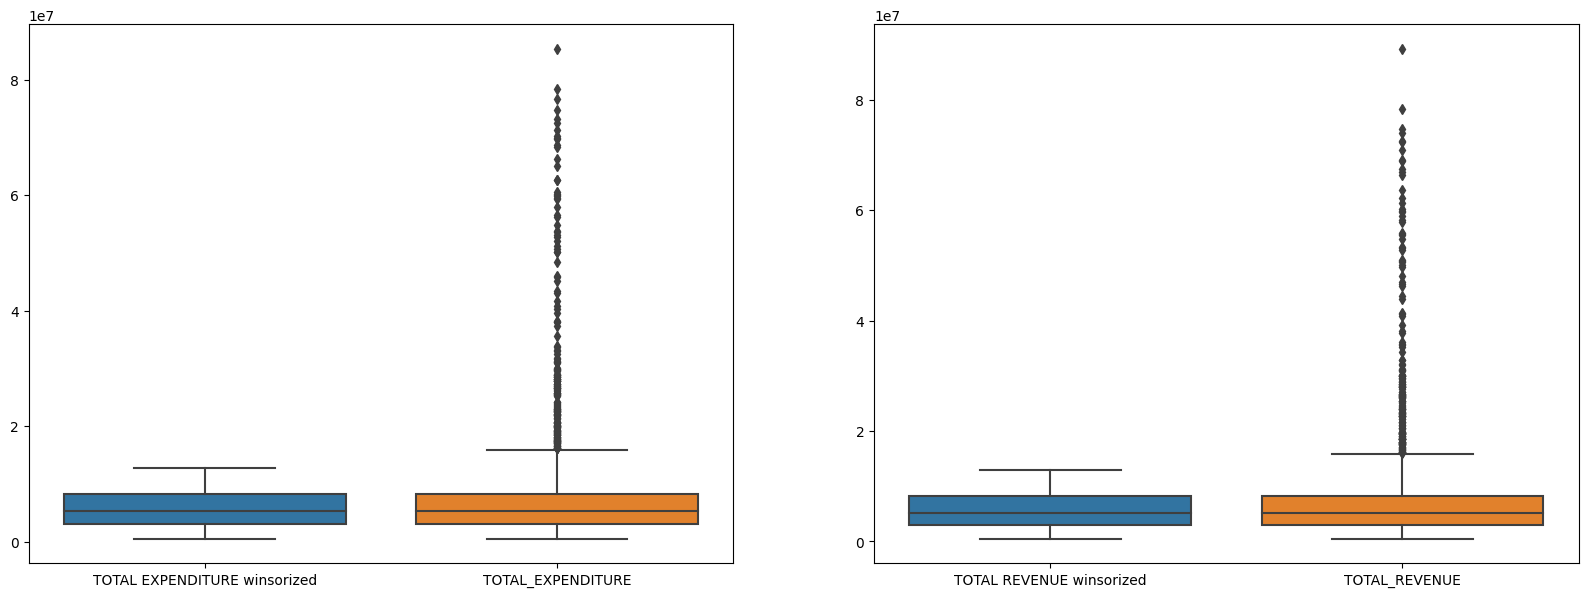

In [57]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

data_EXPENDITURE = pd.concat([pd.Series(TOTAL_EXPENDITURE_winsorization),
                              df_new['TOTAL_EXPENDITURE']], axis=1)
data_EXPENDITURE.columns = ['TOTAL EXPENDITURE winsorized', 'TOTAL_EXPENDITURE']

sns.boxplot(data = data_EXPENDITURE, ax=ax[0])

#####################

data_REVENUE = pd.concat([pd.Series(TOTAL_REVENUE_winsorization),
                              df_new['TOTAL_REVENUE']], axis=1)
data_REVENUE.columns = ['TOTAL REVENUE winsorized', 'TOTAL_REVENUE']

sns.boxplot(data = data_REVENUE, ax=ax[1])



A logaritmic scales are useful when the data you are displaying is much less or much more than the rest of the data or when the percentage differences between values are important. A logarithmic price scale uses the percentage to plot data points, so, the scale prices are not positioned eqidistantly. A linear price scale uses an equal value between price scales providing an equal distance between values. A logaritmic scale is nonlinear scale often used when analyzing a large range of quantities. Instead of increasing in equal increment, each interval is increased by a factor of the logarithm. Typically, a base ten and base a scale are used.

Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data. A log transformation is not always essential to analyzing the data. It can depend on the statistical analysis we are performing.

In [58]:
#Example

[1,2,3,4]

print(np.log(1) - np.log(3) == np.log(1/3))
print('1-2 = ', 1-2)
print(np.log(1) - np.log(2))
print(np.log(2) - np.log(3))
print(np.log(3) - np.log(4))
print(np.log(4) - np.log(5))

print('10-100 = ', 10-100)
print(np.log(10) - np.log(100))
print(np.log(100) - np.log(1000))
print(np.log(1000) - np.log(10000))
print(np.log(10000) - np.log(100000))

True
1-2 =  -1
-0.6931471805599453
-0.4054651081081645
-0.2876820724517808
-0.2231435513142097
10-100 =  -90
-2.302585092994046
-2.302585092994045
-2.302585092994047
-2.302585092994045


Let's transform them by log transformation to narrow the range of values so that the impact of outliers on the entire data decreases

AttributeError: ignored

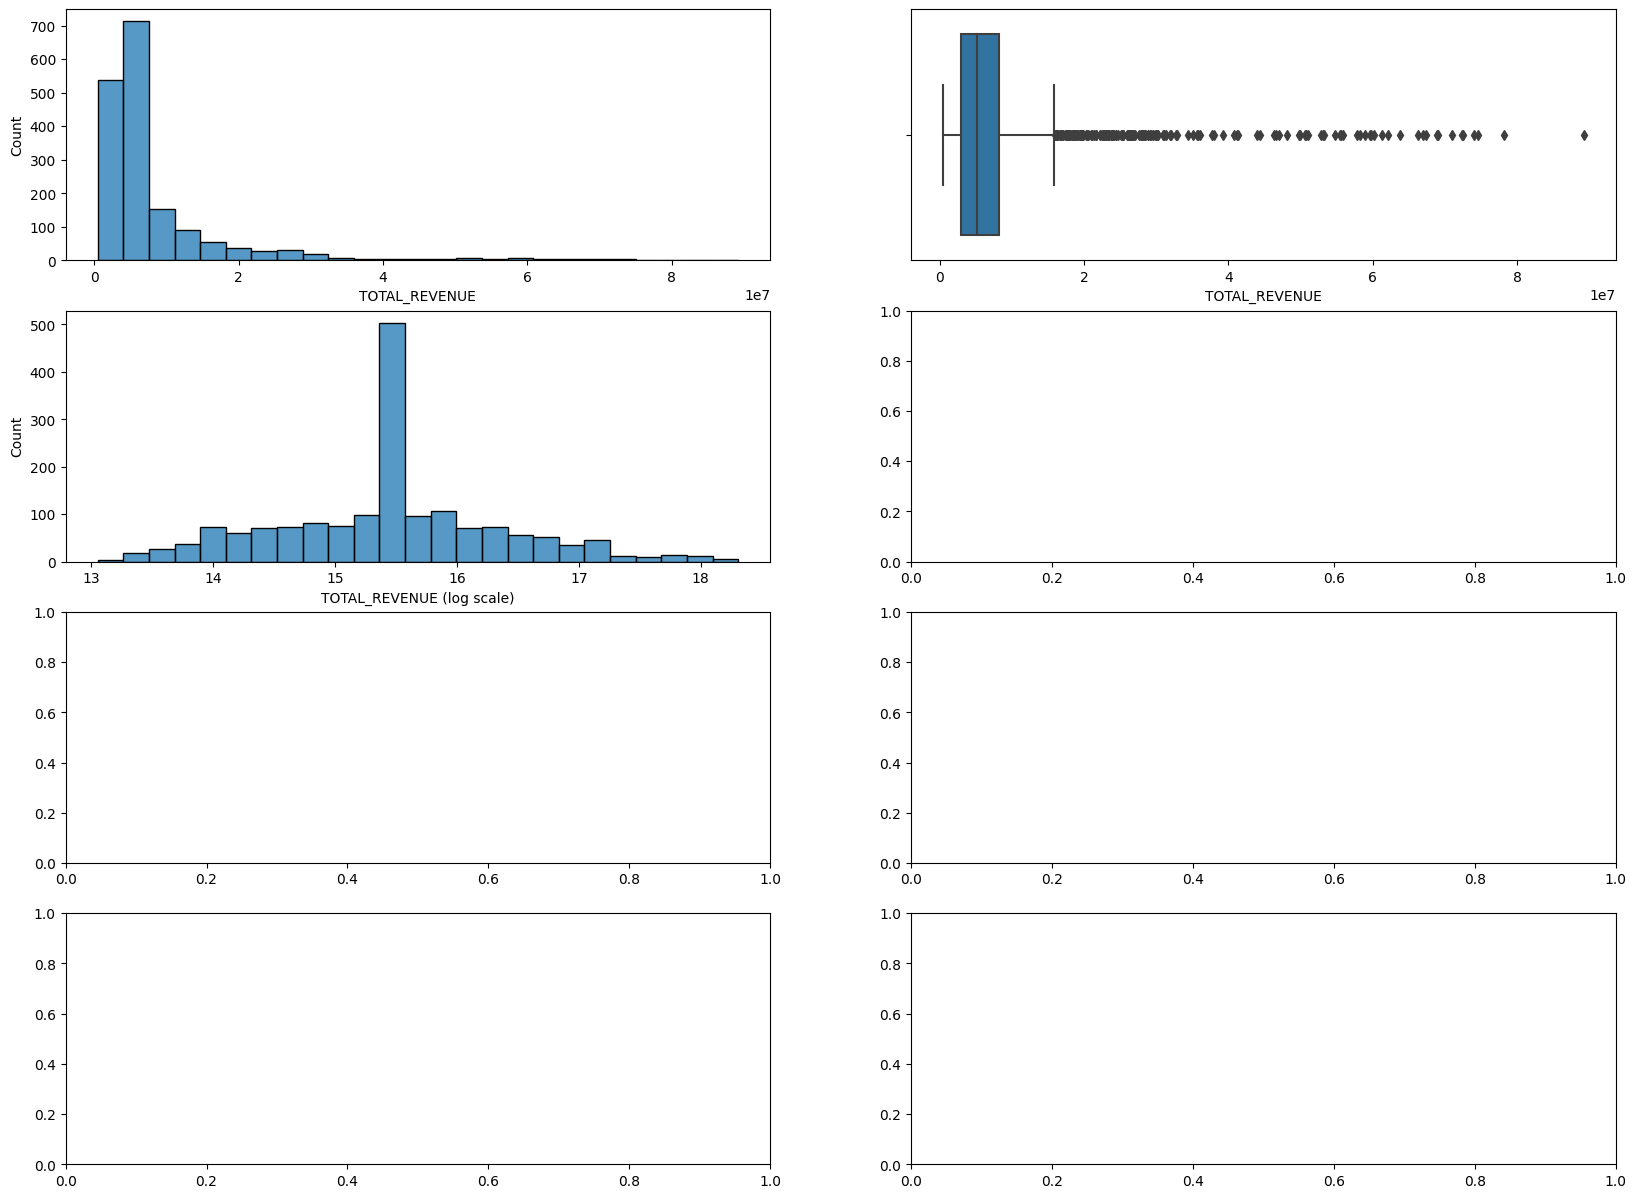

In [60]:
fig, ax = plt.subplots(4,2,figsize=(20,15))

sns.histplot(df_new['TOTAL_REVENUE'], ax=ax[0,0], bins=25)
sns.boxplot(data=df_new, x='TOTAL_REVENUE', ax=ax[0,1], whis=1.5)

sns.histplot(np.log(df_new['TOTAL_REVENUE']), ax=ax[1,0], bins=25)
ax[1,0].set_xlabel('TOTAL_REVENUE (log scale)')

sns.histplot(np.log(df_new['TOTAL_REVENUE']), ax=ax[1,1], whis=1.5)
ax[1,1].set_xlabel('TOTAL_REVENUE (log scale)')

#############

sns.histplot(df_new['TOTAL_EXPENDITURE'], ax=ax[2,0], bins=25)
sns.boxplot(data=df_new, x='TOTAL_EXPENDITURE', ax=ax[2,1], whis=1.5)

sns.histplot(np.log(df_new['TOTAL_EXPENDITURE']), ax=ax[2,0], bins=25)
ax[2,0].set_xlabel('TOTAL_REVENUE (log scale)')

sns.histplot(np.log(df_new['TOTAL_EXPENDITURE']), ax=ax[2,1], whis=1.5)
ax[2,1].set_xlabel('TOTAL_EXPENDITURE (log scale)')